In [1]:
!pip install tensorflow


In [2]:
pip install black


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tf_keras


Note: you may need to restart the kernel to use updated packages.


## Importing Libraries

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

## Train Image Preprocessing

In [8]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r"D:\plant\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train",
   labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


## Validation Image Preprocessing

In [10]:
import os

dataset_path = os.path.abspath(r"C:\Users\HP\Plant\valid")
print(dataset_path)  # This will show the absolute path


C:\Users\HP\Plant\valid


In [11]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r"D:\plant\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid",
   labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [12]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [13]:
for x,y in training_set:
    print(x,y.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[140.5  120.5  131.5 ]
   [135.25 115.25 126.25]
   [133.5  113.5  124.5 ]
   ...
   [145.   132.   141.  ]
   [147.   134.   143.  ]
   [145.5  132.5  141.5 ]]

  [[139.5  119.5  130.5 ]
   [136.   116.   127.  ]
   [136.25 116.25 127.25]
   ...
   [145.75 132.75 141.75]
   [147.   134.   143.  ]
   [145.5  132.5  141.5 ]]

  [[140.   120.   131.  ]
   [138.5  118.5  129.5 ]
   [138.75 118.75 129.75]
   ...
   [147.   134.   143.  ]
   [147.25 134.25 143.25]
   [145.5  132.5  141.5 ]]

  ...

  [[136.75 124.75 128.75]
   [135.25 123.25 127.25]
   [135.   123.   127.  ]
   ...
   [156.75 147.75 152.75]
   [157.5  148.5  153.5 ]
   [157.75 148.75 153.75]]

  [[139.   127.   131.  ]
   [137.25 125.25 129.25]
   [143.75 131.75 135.75]
   ...
   [154.25 145.25 150.25]
   [153.25 144.25 149.25]
   [157.75 148.75 153.75]]

  [[142.5  130.5  134.5 ]
   [142.   130.   134.  ]
   [149.   137.   141.  ]
   ...
   [154.25 145.25 150.25]
   [155.5  146.5  151.5 ]
   [157.75 148.75 15

## To avoid Overshooting
1.Choose small learning rate default  0.001 we are taking 0.0001
2.There may be chance od underfitting, so increase number of neuron
3.Add moore Convolution layer to extract more feature from images there may be possibility that module unable to capture relevant features or model is confusing due to lack of feature so feed with more feature

## Building Model

In [16]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [17]:
model = Sequential()

In [18]:
## Building Convolution Layer

In [19]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(128, 128, 3)))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

D:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [21]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [22]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [23]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [24]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [25]:
model.add(Flatten())

In [26]:
model.add(Dense(units=1500,activation='relu'))

In [27]:
model.add(Dropout(0.4))

In [28]:
# Output Layer
model.add(Dense(units=38,activation='softmax'))

## Compiling Model

In [30]:
import tensorflow as tf

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 31, 31, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [33]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 770s 350ms/step - accuracy: 0.4041 - loss: 2.1062 - val_accuracy: 0.8334 - val_loss: 0.5284
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 767s 349ms/step - accuracy: 0.8399 - loss: 0.5085 - val_accuracy: 0.9022 - val_loss: 0.3070
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 776s 353ms/step - accuracy: 0.9035 - loss: 0.2998 - val_accuracy: 0.9344 - val_loss: 0.2022
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 765s 348ms/step - accuracy: 0.9346 - loss: 0.2057 - val_accuracy: 0.9283 - val_loss: 0.2212
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 734s 334ms/step - accuracy: 0.9510 - loss: 0.1517 - val_accuracy: 0.9348 - val_loss: 0.2059
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 737s 335ms/step - accuracy: 0.9599 - loss: 0.1227 - val_accuracy: 0.9594 - val_loss: 0.1250
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 737s 335ms/step - accuracy: 0.9678 - loss: 0.0977 - val_accuracy: 0.9562 - val_loss: 0.1417
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 740s 337ms/step - ac

### Model Evolution

In [35]:
#Model Evaluation on Training set
train_loss,train_acc = model. evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 213s 97ms/step - accuracy: 0.9885 - loss: 0.0383


In [36]:
print(train_loss,train_acc)

0.03472655266523361 0.9895725250244141


In [37]:
# Model on Validation set
val_loss,val_acc = model. evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 53s 96ms/step - accuracy: 0.9630 - loss: 0.1248


In [38]:
print(val_loss,val_acc)

0.11938893049955368 0.9639768004417419


## Saving Model

In [40]:
model.save("trained_model.keras")

In [41]:
training_history.history

{'accuracy': [0.609630823135376,
  0.8629631996154785,
  0.9148730635643005,
  0.9400810599327087,
  0.9535813331604004,
  0.9632406234741211,
  0.9706095457077026,
  0.9752187132835388,
  0.9786471128463745,
  0.9810512661933899],
 'loss': [1.3195618391036987,
  0.4303881525993347,
  0.2622362971305847,
  0.1866203099489212,
  0.14208084344863892,
  0.11320987343788147,
  0.09026502817869186,
  0.07377966493368149,
  0.06635504961013794,
  0.057279471307992935],
 'val_accuracy': [0.8333712816238403,
  0.9021739363670349,
  0.9343842267990112,
  0.9282950162887573,
  0.9347826242446899,
  0.9594240784645081,
  0.9561802744865417,
  0.9345549941062927,
  0.9461643695831299,
  0.9639768004417419],
 'val_loss': [0.5283622741699219,
  0.3069988489151001,
  0.202192485332489,
  0.22122156620025635,
  0.20593491196632385,
  0.12498068809509277,
  0.14168429374694824,
  0.2294803410768509,
  0.18363867700099945,
  0.11938892304897308]}

In [42]:
# Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

## Accuracy Visualization

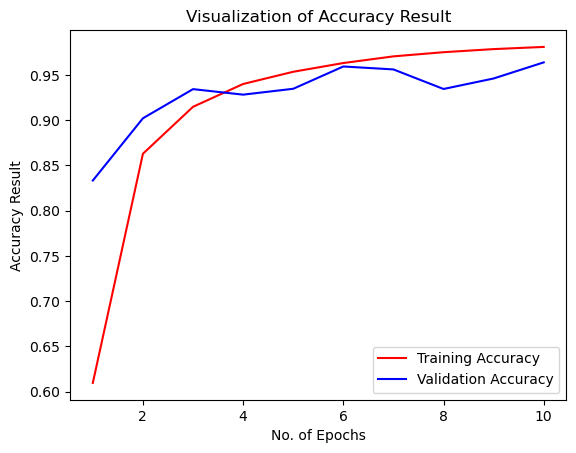

In [44]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Some Other metrics for model evaluation

In [46]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [47]:
test_set = tf.keras.utils.image_dataset_from_directory(
    r"D:\plant\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid",
   labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [48]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 52s 95ms/step


(array([[1.0000000e+00, 4.7372140e-10, 1.3273528e-10, ..., 3.5768288e-20,
         1.7403750e-14, 2.2404570e-13],
        [1.0000000e+00, 3.6134392e-12, 3.0403045e-11, ..., 1.9794363e-22,
         1.1281459e-14, 1.6635742e-15],
        [1.0000000e+00, 3.4067421e-10, 6.9622015e-09, ..., 1.9891833e-17,
         5.2672965e-13, 4.9729137e-11],
        ...,
        [6.6111287e-14, 2.5838051e-18, 1.8043907e-12, ..., 6.9371873e-17,
         2.3581723e-16, 1.0000000e+00],
        [6.6263835e-13, 6.5179278e-17, 2.6717417e-12, ..., 8.2259368e-15,
         2.6229678e-14, 1.0000000e+00],
        [2.0705985e-13, 1.5129574e-15, 3.1117654e-13, ..., 1.4724914e-14,
         4.1809551e-12, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [49]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [50]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [51]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [52]:
y_true = tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.91      0.97      0.94       504
                                 Apple___Black_rot       0.99      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.96      0.99      0.98       440
                                   Apple___healthy       0.99      0.88      0.93       502
                               Blueberry___healthy       0.98      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.96      0.99      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.94      0.93       410
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.93      0.

In [55]:
cm = confusion_matrix(y_true,predicted_categories)
cm

array([[491,   1,   1, ...,   0,   0,   1],
       [  1, 492,   0, ...,   0,   0,   0],
       [  0,   0, 437, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 485,   0,   0],
       [  0,   0,   1, ...,   0, 445,   0],
       [  0,   0,   2, ...,   0,   0, 476]], dtype=int64)

## Confusion Matrix Visualization

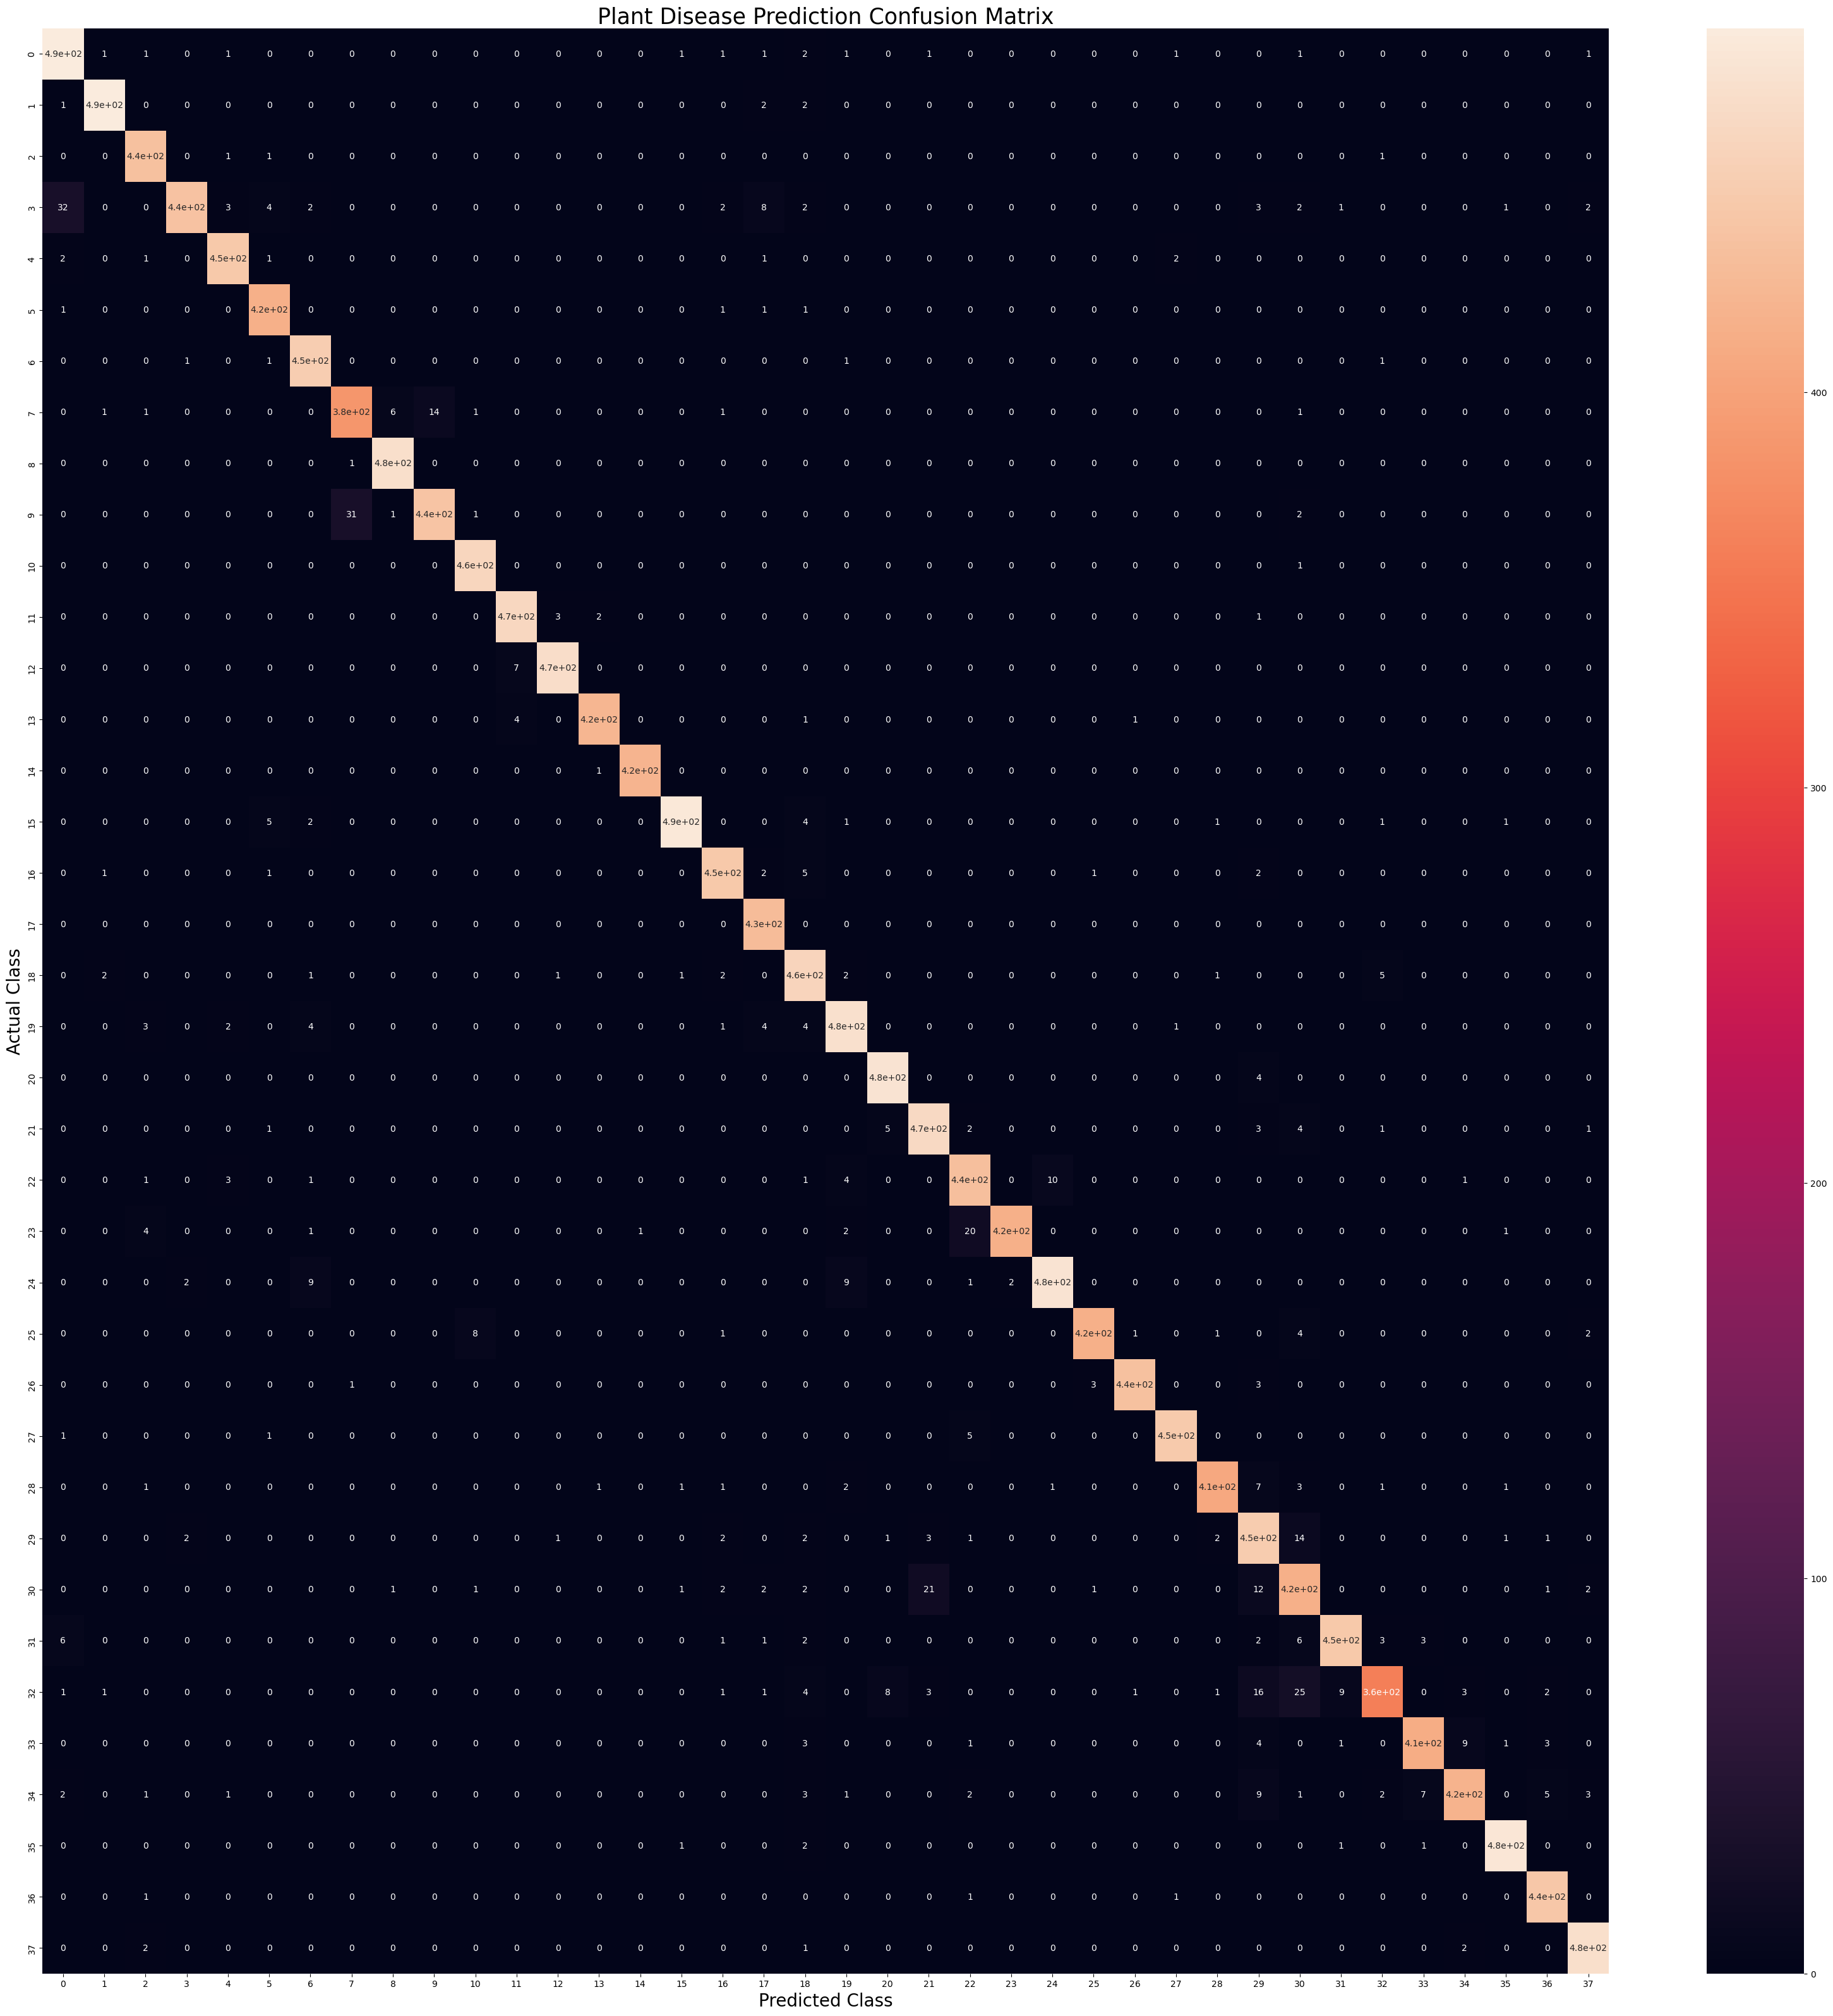

In [57]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()

## Visualizing Single Image of Test set

In [59]:
!pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.5 MB ? eta -:--:--
    --------------------------------------- 0.5/39.5 MB 764.3 kB/s eta 0:00:51
    --------------------------------------- 0.5/39.5 MB 764.3 kB/s eta 0:00:51
    --------------------------------------- 0.8/39.5 MB 819.2 kB/s eta 0:00:48
   - -------------------------------------- 1.0/39.5 MB 932.9 kB/s eta 0:00:42
   - -------------------------------------- 1.6/39.5 MB 1.1 MB/s eta 0:00:35
   -- ------------------------------------- 2.1/39.5 MB 1.3 MB/s eta 0:00:30
   -- ------------------------------------- 2.4/39.5 MB 1.3 MB/s eta 0:00:28
   -- ------------------------------------- 2.9/39.5 MB 1.4 MB/s eta 0:00:27
   --- ------------------------------------ 3.1/39.5 MB 1.4 MB/s eta 0:00:26
   --- ------------

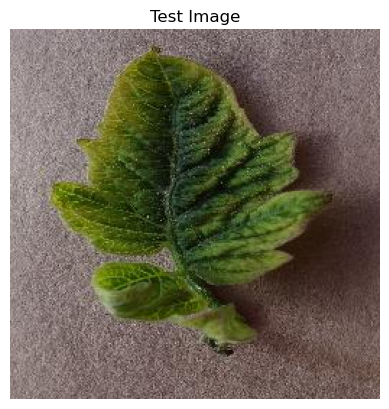

In [60]:
import cv2
import matplotlib.pyplot as plt

image_path = r"D:\plant\test\test\TomatoYellowCurlVirus1.JPG"

# Read the image
img = cv2.imread(image_path)

if img is None:
    print("Error: Image not found. Check the file path.")
else:
    # Convert BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img_rgb)
    plt.title("Test Image")
    plt.axis("off")  # Hide axes
    plt.show()


## Testing Model

In [62]:
import numpy as np
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #Convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [63]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


(array([[3.57708974e-10, 1.07422758e-10, 1.28750655e-08, 2.39091946e-09,
         5.60413604e-10, 6.16101659e-07, 6.07604808e-12, 5.16379661e-10,
         8.05796662e-12, 4.94967234e-10, 1.30170779e-11, 1.01765121e-08,
         6.59056980e-07, 3.06205220e-06, 1.13271306e-12, 2.95766678e-09,
         5.66768010e-09, 1.51322607e-10, 2.89149146e-04, 6.37865261e-10,
         8.49727622e-10, 1.68068400e-05, 2.26657138e-09, 5.17093395e-06,
         1.07498916e-08, 4.40580106e-09, 1.70952568e-04, 5.17479499e-08,
         1.47618717e-08, 4.89344675e-05, 8.59705551e-08, 1.21019053e-08,
         5.11190308e-08, 1.80325122e-04, 1.52115501e-06, 9.99282420e-01,
         6.37190922e-08, 3.16863904e-08]], dtype=float32),
 (1, 38))

In [64]:
result_index = np.argmax(prediction)
result_index

35

In [65]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
            'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

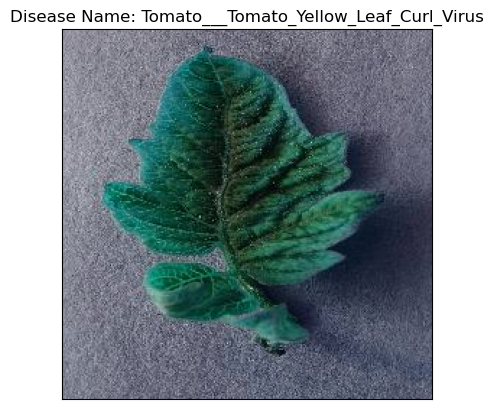

In [66]:
#Displaying Result of disease prediction 
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([]) 
plt.show()

In [67]:
model_prediction

'Tomato___Tomato_Yellow_Leaf_Curl_Virus'